In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse
import scipy.sparse as sp
import os, sys
sys.path.append(os.path.abspath(os.path.join('..')))
import os
import faircat
import stats_utils
from math import comb

In [2]:
dir_path = os.path.join("..", "real_world_data", "German-credit")
nodes_path = os.path.join(dir_path, "german.csv")
edges_path = os.path.join(dir_path, "german_edges.txt")


In [3]:
df = pd.read_csv(nodes_path)

In [4]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

   GoodCustomer  Gender  ForeignWorker  Single  Age  LoanDuration  \
0             1    Male              0       1   67             6   
1            -1  Female              0       0   22            48   
2             1    Male              0       1   49            12   
3             1    Male              0       1   45            42   
4            -1    Male              0       1   53            24   

  PurposeOfLoan  LoanAmount  LoanRateAsPercentOfIncome  YearsAtCurrentHome  \
0   Electronics        1169                          4                   4   
1   Electronics        5951                          2                   2   
2     Education        2096                          2                   3   
3     Furniture        7882                          2                   4   
4        NewCar        4870                          3                   4   

   ...  OtherLoansAtBank  OtherLoansAtStore  HasCoapplicant  HasGuarantor  \
0  ...                 0               

In [37]:
features = df.iloc[:,1:]
target = df.iloc[:,0]
sens = df["Gender"]
edges = pd.read_csv(edges_path, header=None, sep=r"\s+", names=["source", "target"])

In [38]:
print(edges.shape, type(edges))

(24970, 2) <class 'pandas.core.frame.DataFrame'>


In [ ]:
edges.columns = ["source", "target"]

# Convert to integers 
edges["source"] = edges["source"].astype(float).astype(int)
edges["target"] = edges["target"].astype(float).astype(int)

# Determine number of nodes
num_nodes = int(max(edges["source"].max(), edges["target"].max()) + 1)

# Create adjacency matrix
A_true = sparse.csr_matrix(
    (np.ones(len(edges), dtype=int), (edges["source"], edges["target"])),
    shape=(num_nodes, num_nodes)
)

print(f"Adjacency matrix shape: {A_true.shape}")
print(f"Number of edges: {A_true.nnz}")


Adjacency matrix shape: (1000, 1000)
Number of edges: 24970


In [40]:
np.unique(target)
k=2

In [ ]:
k=2 
X_true = features.to_numpy()
Label_true = target.replace({-1: 0, "-1": 0}).to_numpy()
s     = sens.replace({"Male": 0, "Female": 1}).to_numpy()

In [42]:
print(X_true[:5 ])
X_true = np.delete(X_true, 0, axis=1)
print(np.unique(X_true[:, 4]))
vals = X_true[:, 4]
cats, inv = np.unique(vals, return_inverse=True)  # mapping
X_true = X_true.copy()
X_true[:, 4] = inv  
print(np.unique(X_true[:, 4]))

print("X dtype:", X_true.dtype, "shape:", np.shape(X_true))
print("y dtype:", np.asarray(Label_true).dtype, "shape:", np.shape(Label_true))
X_true = X_true.astype(float)
print("X dtype:", X_true.dtype, "shape:", np.shape(X_true))

[['Male' 0 1 67 6 'Electronics' 1169 4 4 2 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
  0 0 1 1]
 ['Female' 0 0 22 48 'Electronics' 5951 2 2 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1
  0 0 0 0 1]
 ['Male' 0 1 49 12 'Education' 2096 2 3 1 2 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
  0 1 0]
 ['Male' 0 1 45 42 'Furniture' 7882 2 4 1 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  0 1 1]
 ['Male' 0 1 53 24 'NewCar' 4870 3 4 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1]]
['Business' 'Education' 'Electronics' 'Furniture' 'HomeAppliances'
 'NewCar' 'Other' 'Repairs' 'Retraining' 'UsedCar']
[0 1 2 3 4 5 6 7 8 9]
X dtype: object shape: (1000, 28)
y dtype: int64 shape: (1000,)
X dtype: float64 shape: (1000, 28)


In [43]:
M,D = faircat.class_reproduction(k,A_true,Label_true)
print(M.shape, D.shape)

(2, 2) (2, 2)


In [44]:
print("M:", M)
print("D:", D)


M: [[0.36136147 0.63863853]
 [0.29348429 0.70651571]]
D: [[0.14453888 0.14453888]
 [0.14416604 0.14416604]]


In [ ]:
# calculate n_0 and n_1
n_0 = np.sum(s == 0)
n_1 = np.sum(s == 1)
print(f"Number of nodes with sensitive attribute 0: {n_0}")
print(f"Number of nodes with sensitive attribute 1: {n_1}")

Number of nodes with sensitive attribute 0: 690
Number of nodes with sensitive attribute 1: 310


In [46]:
print(s)

[0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 0 1 1 

In [47]:
deg_0 = np.sum(A_true[s == 0].sum(axis=1))
deg_1 = np.sum(A_true[s == 1].sum(axis=1))

print(f"Total degree of nodes with sensitive attribute 0: {deg_0}")
print(f"Total degree of nodes with sensitive attribute 1: {deg_1}")


Total degree of nodes with sensitive attribute 0: 17484
Total degree of nodes with sensitive attribute 1: 7486


In [48]:
max_deg_0 = np.max(A_true[s == 0].sum(axis=1))
print(f"Maximum degree of nodes with sensitive attribute 0: {max_deg_0}")

max_deg_1 = np.max(A_true[s == 1].sum(axis=1))
print(f"Maximum degree of nodes with sensitive attribute 1: {max_deg_1}")

Maximum degree of nodes with sensitive attribute 0: 286
Maximum degree of nodes with sensitive attribute 1: 196


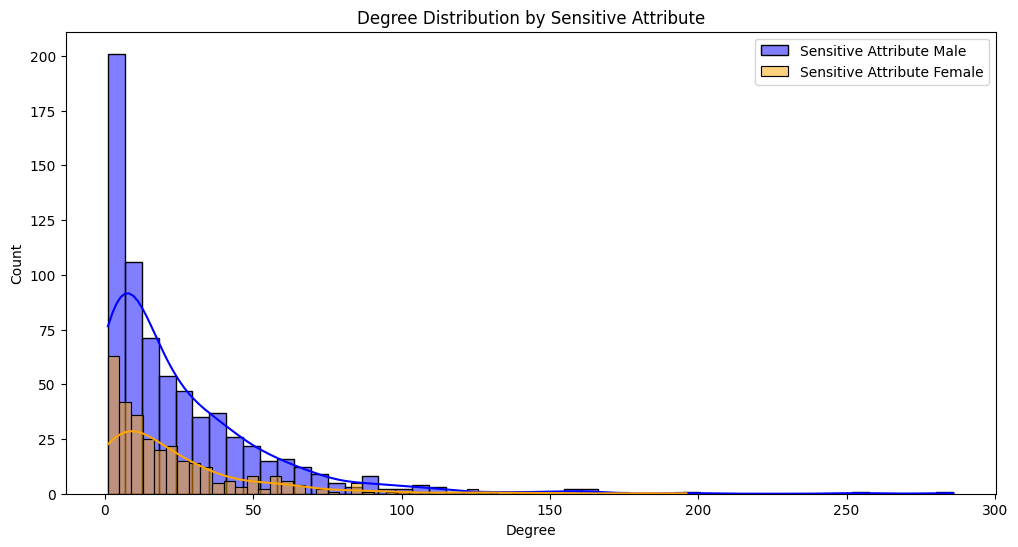

In [49]:
# find the degree distributions type (powerlaw, normal, or uniform) of each value group in sensitive attribute
import matplotlib.pyplot as plt
import seaborn as sns
deg_sequence = np.array(A_true.sum(axis=1)).flatten()
deg_0_sequence = np.array(A_true[s == 0].sum(axis=1)).flatten()
deg_1_sequence = np.array(A_true[s == 1].sum(axis=1)).flatten()
plt.figure(figsize=(12, 6))
sns.histplot(deg_0_sequence, bins=50, color='blue', label='Sensitive Attribute Male', kde=True)
sns.histplot(deg_1_sequence, bins=50, color='orange', label='Sensitive Attribute Female', kde=True)
plt.title('Degree Distribution by Sensitive Attribute')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.legend()
plt.show()



In [50]:
dist_type_0 = "powerlaw"
dist_type_1 = "powerlaw"

In [51]:
# print features types
print("Features shape:", X_true.shape)
print("Features dtype:", X_true.dtype)

Features shape: (1000, 28)
Features dtype: float64


In [ ]:
corr_targets={}
d = d = (X_true.shape[1]+1)
print(d)

In [54]:
# correlation targets 
corr_with_label = np.corrcoef(np.c_[X_true, Label_true], rowvar=False)[-1, :-1]
idx = np.argsort(-np.abs(corr_with_label))[:d-2]
corr_targets = {int(i)+1: float(corr_with_label[i]) for i in idx}
print(corr_targets)

{4: -0.21492666544189, 18: 0.1817130196973274, 6: -0.15473864110152336, 23: 0.1345887757223313, 17: -0.1344477984395148, 15: 0.11323106370891683, 27: 0.11073191880923779, 26: -0.10639685329020661, 19: -0.09651010932799921, 24: -0.09278544671300037, 3: 0.09112740931949884, 12: -0.08989484946006429, 1: 0.08207949878149606, 2: 0.08067680281606501, 7: -0.07240393725133008, 14: 0.07023379314118028, 21: -0.06272836622171613, 22: 0.05503925403760198, 9: 0.04573248933920627, 5: 0.04403024361760612, 13: 0.04400949270374992, 25: -0.03981491245899968, 11: 0.03646619017996341, 28: -0.01890281864403543, 16: 0.012324564444108984, 10: 0.0030148530833447144, 8: -0.002967158754155336}


In [55]:
H = np.zeros((d-1, k))
for j in range(d-1):
    for c in range(k):
        mask = Label_true == c
        H[j, c] = X_true[mask, j].mean() if mask.any() else 0.0
    row_sum = H[j].sum()
    if row_sum > 0:
        H[j] /= row_sum
    else:
        H[j] = np.ones(k) / k
    H[j] = np.clip(H[j], 0.0, 1.0)
print(H.shape)

(28, 2)


In [56]:
print(H.dtype)

float64


In [57]:
count_s0c0 = np.sum((s == 0) & (Label_true == 0))
count_s0c1 = np.sum((s == 0) & (Label_true == 1))
count_s1c0 = np.sum((s == 1) & (Label_true == 0))
count_s1c1 = np.sum((s == 1) & (Label_true == 1))

count_s0c0_norm = count_s0c0 / n_0
count_s0c1_norm = count_s0c1 / n_0
count_s1c0_norm = count_s1c0 / n_1
count_s1c1_norm = count_s1c1 / n_1
print(count_s0c0_norm, count_s0c1_norm, count_s1c0_norm, count_s1c1_norm)

Pcg = [[count_s0c0_norm, count_s0c1_norm],[ count_s1c0_norm, count_s1c1_norm]]
print(Pcg)

0.2768115942028985 0.7231884057971014 0.35161290322580646 0.6483870967741936
[[0.2768115942028985, 0.7231884057971014], [0.35161290322580646, 0.6483870967741936]]


In [58]:
from scipy.stats import chi2_contingency

table = [[count_s0c0, count_s0c1],
         [count_s1c0, count_s1c1]]

chi2, p, dof, expected = chi2_contingency(table)
print("Chi-squared Test:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

Chi-squared Test:
Chi2 Statistic: 5.348516218081436, p-value: 0.020739913068713305, Degrees of Freedom: 1


In [59]:
S, X, Label, theta, sorted_attr_group = faircat.faircat(
            n_0, n_1, deg_0, deg_1,
            k, d, max_deg_0, max_deg_1,
            dist_type_0, dist_type_1,
            Pcg, M, D, H,
            att_type="normal",
            corr_targets=corr_targets,
            MAPE=True
        )

sum of degrees for group (target=17484): 19704
break
sum of degrees for group (target=7486): 9908
saturated attempts: 53849
number of generated edges : 14749
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling

### Saving to npy

In [60]:
adj = S.tocoo() if sp.issparse(S) else sp.coo_matrix(S)

mask = adj.row < adj.col  # keep one direction
edges = np.vstack((adj.row[mask], adj.col[mask])).astype(np.int64)

out_dir = r"data\german_faircat_hundered"
os.makedirs(out_dir, exist_ok=True)

np.save(os.path.join(out_dir, "edges.npy"), edges)
np.save(os.path.join(out_dir, "features.npy"), X)
np.save(os.path.join(out_dir, "labels.npy"),   Label)
np.save(os.path.join(out_dir, "sens.npy"),   sorted_attr_group)

## Statistics, community=sens

In [22]:
# REAL GRAPH STATS
intra, inter = stats_utils.inter_intra_counts(A_true, s)
print("intra edges:", intra)
print("inter edges per group:", inter)

#intra-community density
s = np.array(s)
nc_0 = len(s[s == 0])
max_possible_0 = comb(nc_0, 2)
nc_1 = len(s[s == 1])
max_possible_1 = comb(nc_1, 2)
intra_density = 1/2*(1/max_possible_0*intra[0] + 1/max_possible_1*intra[1])
print("intra-community density:", intra_density)
intra_density_0 = 1/max_possible_0*intra[0]
intra_density_1 = 1/max_possible_1*intra[1] 
print("intra-group densities group 0 average:", np.mean(intra_density_0))
print("intra-group densities group 1 average:", np.mean(intra_density_1))

#inter-community density
inter_density = (inter[0])/(nc_0*nc_1)
print("inter-community density:", inter_density)
print("LCC size:", stats_utils.lcc_size_numpy(A_true)[0])
print("LCC size_0:", stats_utils.lcc_size_numpy(A_true[s == 0][:, s == 0])[0])
print("LCC size_1:", stats_utils.lcc_size_numpy(A_true[s == 1][:, s == 1])[0])

print("number of components:", stats_utils.lcc_size_numpy(A_true)[1])
print("number of components_0:", stats_utils.lcc_size_numpy(A_true[s == 0][:, s == 0])[1])
print("number of components_1:", stats_utils.lcc_size_numpy(A_true[s == 1][:, s == 1])[1])

characteristic_path = stats_utils.characteristic_path_length(A_true)
characteristic_path_0 = stats_utils.characteristic_path_length(A_true[s == 0][:, s == 0])
characteristic_path_1 = stats_utils.characteristic_path_length(A_true[s == 1][:, s == 1])

print("characteristic path length:", characteristic_path)
print("characteristic path length_0:", characteristic_path_0)
print("characteristic path length_1:", characteristic_path_1)

intra edges: {0: 7719, 1: 2414}
inter edges per group: {0: 2322, 1: 2322}
intra-community density: 0.04143747207686552
intra-group densities group 0 average: 0.03247302328516438
intra-group densities group 1 average: 0.05040192086856666
inter-community density: 0.01085553997194951
LCC size: 1000
LCC size_0: 690
LCC size_1: 310
number of components: 1
number of components_0: 1
number of components_1: 1
characteristic path length: 2.459785785785786
characteristic path length_0: 2.409936686228729
characteristic path length_1: 2.380812193339597


In [23]:
# FAKE GRAPH STATISTICS
for i in range(5):
    S, X, Label, theta, sorted_attr_group = faircat.faircat(
            n_0, n_1, deg_0, deg_1,
            k, d, max_deg_0, max_deg_1,
            dist_type_0, dist_type_1,
            Pcg, M, D, H,
            att_type="normal",
            corr_targets=corr_targets,
            MAPE=True
        )
    intra, inter = stats_utils.inter_intra_counts(S, sorted_attr_group)
    print("intra edges:", intra)
    print("inter edges per group:", inter)

    #intra-community density
    sorted_attr_group = np.array(sorted_attr_group)
    nc_0 = len(sorted_attr_group[sorted_attr_group == 0])
    max_possible_0 = comb(nc_0, 2)
    nc_1 = len(sorted_attr_group[sorted_attr_group == 1])
    max_possible_1 = comb(nc_1, 2)
    intra_density = 1/2*(1/max_possible_0*intra[0] + 1/max_possible_1*intra[1])
    intra_density_0 = 1/max_possible_0*intra[0]
    intra_density_1 = 1/max_possible_1*intra[1] 
    #inter-community density
    inter_density = (inter[0])/(nc_0*nc_1)

    print("LCC size:", stats_utils.lcc_size_numpy(S)[0])
    print("LCC size_0:", stats_utils.lcc_size_numpy(S[sorted_attr_group == 0][:, sorted_attr_group == 0])[0])
    print("LCC size_1:", stats_utils.lcc_size_numpy(S[sorted_attr_group == 1][:, sorted_attr_group == 1])[0])

    print("number of components:", stats_utils.lcc_size_numpy(S)[1])
    print("number of components_0:", stats_utils.lcc_size_numpy(S[sorted_attr_group == 0][:, sorted_attr_group == 0])[1])
    print("number of components_1:", stats_utils.lcc_size_numpy(S[sorted_attr_group == 1][:, sorted_attr_group == 1])[1])
    characteristic_path = stats_utils.characteristic_path_length(S)
    characteristic_path_0 = stats_utils.characteristic_path_length(S[sorted_attr_group == 0][:, sorted_attr_group == 0])
    characteristic_path_1 = stats_utils.characteristic_path_length(S[sorted_attr_group == 1][:, sorted_attr_group == 1])
    print("characteristic path length:", characteristic_path)
    print("characteristic path length_0:", characteristic_path_0)
    print("characteristic path length_1:", characteristic_path_1)
    
print("intra-community average:", np.mean(intra_density))
print("intra-group densities group 0 average:", np.mean(intra_density_0))
print("intra-group densities group 1 average:", np.mean(intra_density_1))
print("inter-community average:", np.mean(inter_density))
print("average path length average:", np.mean(characteristic_path))
print("average characteristic path length_0:", np.mean(characteristic_path_0))
print("average characteristic path length_1:", np.mean(characteristic_path_1))

sum of degrees for group (target=17484): 22171
sum of degrees for group (target=7486): 7743
saturated attempts: 53795
number of generated edges : 14901
intra edges: {0: 8194, 1: 995}
inter edges per group: {0: 5712, 1: 5712}
LCC size: 1000
LCC size_0: 690
LCC size_1: 116
number of components: 1
number of components_0: 1
number of components_1: 195
characteristic path length: 2.3555075075075074
characteristic path length_0: 2.3287646452535706
characteristic path length_1: 1.9665667166416791
sum of degrees for group (target=17484): 18059
sum of degrees for group (target=7486): 8456
saturated attempts: 48666
number of generated edges : 13216
intra edges: {0: 6156, 1: 1363}
inter edges per group: {0: 5697, 1: 5697}
LCC size: 1000
LCC size_0: 690
LCC size_1: 153
number of components: 1
number of components_0: 1
number of components_1: 158
characteristic path length: 2.421333333333333
characteristic path length_0: 2.4342609537031192
characteristic path length_1: 2.0871173030615755
sum of deg

### Statistics, community=Label

In [24]:
Label = np.asarray(Label)          # make it an array
mask0 = Label == 0
print(mask0.shape, mask0.sum())    # should match S.shape[0]
S0 = S[mask0][:, mask0]
print(S0.shape)


(1000,) 313
(313, 313)


In [25]:
# REAL GRAPH STATS

intra, inter = stats_utils.inter_intra_counts(A_true, Label_true)
print("intra edges:", intra)
print("inter edges per group:", inter)

#intra-community density
Label_true = np.array(Label_true)
nc_0 = len(Label_true[Label_true == 0])
max_possible_0 = comb(nc_0, 2)
nc_1 = len(Label_true[Label_true == 1])
max_possible_1 = comb(nc_1, 2)
intra_density = 1/2*(1/max_possible_0*intra[0] + 1/max_possible_1*intra[1])
print("intra-community density:", intra_density)
intra_density_0 = 1/max_possible_0*intra[0]
intra_density_1 = 1/max_possible_1*intra[1] 
print("intra-group densities group 0 average:", np.mean(intra_density_0))
print("intra-group densities group 1 average:", np.mean(intra_density_1))

#inter-community density
inter_density = (inter[0])/(nc_0*nc_1)
print("inter-community density:", inter_density)
print("LCC size:", stats_utils.lcc_size_numpy(A_true)[0])
print("LCC size_0:", stats_utils.lcc_size_numpy(A_true[Label_true == 0][:, Label_true == 0])[0])
print("LCC size_1:", stats_utils.lcc_size_numpy(A_true[Label_true == 1][:, Label_true == 1])[0])

print("number of components:", stats_utils.lcc_size_numpy(A_true)[1])
print("number of components_0:", stats_utils.lcc_size_numpy(A_true[Label_true == 0][:, Label_true == 0])[1])
print("number of components_1:", stats_utils.lcc_size_numpy(A_true[Label_true == 1][:, Label_true == 1])[1])

characteristic_path = stats_utils.characteristic_path_length(A_true)
characteristic_path_0 = stats_utils.characteristic_path_length(A_true[Label_true == 0][:, Label_true == 0])
characteristic_path_1 = stats_utils.characteristic_path_length(A_true[Label_true == 1][:, Label_true == 1])
print("characteristic path length:", characteristic_path)
print("characteristic path length_0:", characteristic_path_0)
print("characteristic path length_1:", characteristic_path_1)

intra edges: {0: 1393, 1: 5952}
inter edges per group: {0: 5110, 1: 5110}
intra-community density: 0.027693859291172223
intra-group densities group 0 average: 0.031059085841694537
intra-group densities group 1 average: 0.02432863274064991
inter-community density: 0.024333333333333332
LCC size: 1000
LCC size_0: 300
LCC size_1: 700
number of components: 1
number of components_0: 1
number of components_1: 1
characteristic path length: 2.459785785785786
characteristic path length_0: 2.609030100334448
characteristic path length_1: 2.6186429593296547


In [26]:
# FAKE GRAPH STATISTICS
for i in range(5):
    S, X, Label, theta, sorted_attr_group = faircat.faircat(
            n_0, n_1, deg_0, deg_1,
            k, d, max_deg_0, max_deg_1,
            dist_type_0, dist_type_1,
            Pcg, M, D, H,
            att_type="normal",
            corr_targets=corr_targets,
            MAPE=True
        )
    intra, inter = stats_utils.inter_intra_counts(S, sorted_attr_group)
    print("intra edges:", intra)
    print("inter edges per group:", inter)

    #intra-community density
    sorted_attr_group = np.array(sorted_attr_group)
    nc_0 = len(sorted_attr_group[sorted_attr_group == 0])
    max_possible_0 = comb(nc_0, 2)
    nc_1 = len(sorted_attr_group[sorted_attr_group == 1])
    max_possible_1 = comb(nc_1, 2)
    intra_density = 1/2*(1/max_possible_0*intra[0] + 1/max_possible_1*intra[1])
    intra_density_0 = 1/max_possible_0*intra[0]
    intra_density_1 = 1/max_possible_1*intra[1] 
    #inter-community density
    inter_density = (inter[0])/(nc_0*nc_1)

    print("LCC size:", stats_utils.lcc_size_numpy(A_true)[0])
    print("LCC size_0:", stats_utils.lcc_size_numpy(A_true[Label_true == 0][:, Label_true == 0])[0])
    print("LCC size_1:", stats_utils.lcc_size_numpy(A_true[Label_true == 1][:, Label_true == 1])[0])

    print("number of components:", stats_utils.lcc_size_numpy(A_true)[1])
    print("number of components_0:", stats_utils.lcc_size_numpy(A_true[Label_true == 0][:, Label_true == 0])[1])
    print("number of components_1:", stats_utils.lcc_size_numpy(A_true[Label_true == 1][:, Label_true == 1])[1])

    characteristic_path = stats_utils.characteristic_path_length(A_true)
    characteristic_path_0 = stats_utils.characteristic_path_length(A_true[Label_true == 0][:, Label_true == 0])
    characteristic_path_1 = stats_utils.characteristic_path_length(A_true[Label_true == 1][:, Label_true == 1])
    print("characteristic path length:", characteristic_path)
    print("characteristic path length_0:", characteristic_path_0)
    print("characteristic path length_1:", characteristic_path_1)

print("intra-community average:", np.mean(intra_density))
print("intra-group densities group 0 average:", np.mean(intra_density_0))
print("intra-group densities group 1 average:", np.mean(intra_density_1))
print("inter-community average:", np.mean(inter_density))
print("average path length average:", np.mean(characteristic_path))
print("average characteristic path length_0:", np.mean(characteristic_path_0))
print("average characteristic path length_1:", np.mean(characteristic_path_1))

sum of degrees for group (target=17484): 23691
break
sum of degrees for group (target=7486): 9056
saturated attempts: 54063
number of generated edges : 16321
intra edges: {0: 8516, 1: 1219}
inter edges per group: {0: 6586, 1: 6586}
LCC size: 1000
LCC size_0: 300
LCC size_1: 700
number of components: 1
number of components_0: 1
number of components_1: 1
characteristic path length: 2.459785785785786
characteristic path length_0: 2.609030100334448
characteristic path length_1: 2.6186429593296547
sum of degrees for group (target=17484): 18188
sum of degrees for group (target=7486): 8654
saturated attempts: 47306
number of generated edges : 13356
intra edges: {0: 6135, 1: 1374}
inter edges per group: {0: 5847, 1: 5847}
LCC size: 1000
LCC size_0: 300
LCC size_1: 700
number of components: 1
number of components_0: 1
number of components_1: 1
characteristic path length: 2.459785785785786
characteristic path length_0: 2.609030100334448
characteristic path length_1: 2.6186429593296547
sum of deg

In [27]:
A, X, Label, theta, sorted_attr_group = faircat.faircat(
            n_0, n_1, deg_0, deg_1,
            k, d, max_deg_0, max_deg_1,
            dist_type_0, dist_type_1,
            Pcg, M, D, H,
            att_type="normal",
            corr_targets=corr_targets,
            MAPE=True
        )

sum of degrees for group (target=17484): 19304
sum of degrees for group (target=7486): 8687
saturated attempts: 50694
number of generated edges : 13951


In [ ]:
# Compute mape
A = A.tocsr()
A.setdiag(0)
if hasattr(A, "eliminate_zeros"):
    A.eliminate_zeros()
if A.nnz:
    A.data[:] = 1

theta_actual = np.array(A.sum(axis=1)).ravel().astype(float)
theta_target = np.asarray(theta, float)
theta_target = np.clip(theta_target, 1e-12, None)

mape_total = np.mean(np.abs(theta_actual - theta_target) / theta_target)

g = np.asarray(sorted_attr_group)
mape_0 = np.mean(np.abs(theta_actual[g==0] - theta_target[g==0]) / theta_target[g==0])
mape_1 = np.mean(np.abs(theta_actual[g==1] - theta_target[g==1]) / theta_target[g==1])

In [29]:
print("Overall MAPE:", f"{mape_total:.2e}")
print("MAPE for sensitive attribute 0:", f"{mape_0:.2e}")
print("MAPE for sensitive attribute 1:", f"{mape_1:.2e}")

Overall MAPE: 1.25e-03
MAPE for sensitive attribute 0: 1.28e-03
MAPE for sensitive attribute 1: 1.18e-03


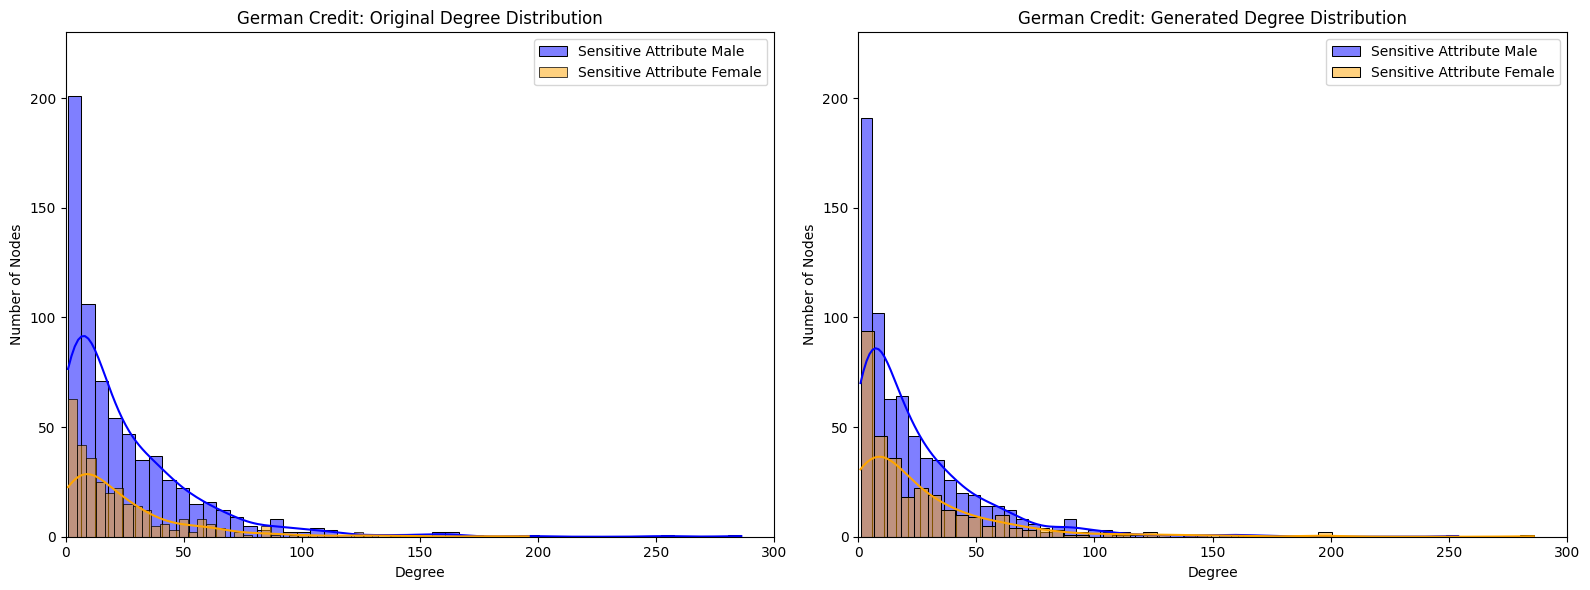

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# left graph: real graph
deg_sequence = np.array(A_true.sum(axis=1)).flatten()
deg_0_sequence = np.array(A_true[s == 0].sum(axis=1)).flatten()
deg_1_sequence = np.array(A_true[s == 1].sum(axis=1)).flatten()
sns.histplot(deg_0_sequence, bins=50, color='blue', ax=axes[0],label='Sensitive Attribute Male', kde=True)
sns.histplot(deg_1_sequence, bins=50, color='orange', ax=axes[0], label='Sensitive Attribute Female', kde=True)
axes[0].set_title('German Credit: Original Degree Distribution')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Number of Nodes')
axes[0].set_xlim(0, 300)
axes[0].set_ylim(0, 230)
axes[0].legend()

#right graph: generated graph
deg_sequence_gen = np.array(A_true.sum(axis=1)).flatten()
deg_0_sequence_gen = np.array(A_true[X[:, 0] == 0].sum(axis=1)).flatten()
deg_1_sequence_gen = np.array(A_true[X[:, 0] == 1].sum(axis=1)).flatten()
sns.histplot(deg_0_sequence_gen, bins=50, color='blue', ax=axes[1],label='Sensitive Attribute Male', kde=True)
sns.histplot(deg_1_sequence_gen, bins=50, color='orange', ax=axes[1], label='Sensitive Attribute Female', kde=True)
axes[1].set_title('German Credit: Generated Degree Distribution')

axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Number of Nodes')
axes[1].legend()
axes[1].set_xlim(0, 300)
axes[1].set_ylim(0, 230)

plt.tight_layout()
plt.show()


### Target correlations

In [31]:
print(X_true.shape, Label_true.shape)

(1000, 28) (1000,)


In [32]:
# correlation targets are 40 largest correlations
corr_with_label = np.corrcoef(np.c_[X_true, Label_true], rowvar=False)[-1, :-1]
idx = np.argsort(-np.abs(corr_with_label))[:27]
corr_targets = {int(i)+1: float(corr_with_label[i]) for i in idx}
print(corr_targets)

{4: -0.21492666544189, 18: 0.1817130196973274, 6: -0.15473864110152336, 23: 0.1345887757223313, 17: -0.1344477984395148, 15: 0.11323106370891683, 27: 0.11073191880923779, 26: -0.10639685329020661, 19: -0.09651010932799921, 24: -0.09278544671300037, 3: 0.09112740931949884, 12: -0.08989484946006429, 1: 0.08207949878149606, 2: 0.08067680281606501, 7: -0.07240393725133008, 14: 0.07023379314118028, 21: -0.06272836622171613, 22: 0.05503925403760198, 9: 0.04573248933920627, 5: 0.04403024361760612, 13: 0.04400949270374992, 25: -0.03981491245899968, 11: 0.03646619017996341, 28: -0.01890281864403543, 16: 0.012324564444108984, 10: 0.0030148530833447144, 8: -0.002967158754155336}


In [33]:
S, X, Label = faircat.faircat(
            n_0, n_1, deg_0, deg_1,
            k, d, max_deg_0, max_deg_1,
            dist_type_0, dist_type_1,
            Pcg, M, D, H,
            att_type="normal",
            corr_targets=corr_targets
        )

sum of degrees for group (target=17484): 17887
sum of degrees for group (target=7486): 8335
saturated attempts: 45762
number of generated edges : 13066
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjusted continuous attribute to [0,1]
Rescaling adjus

In [34]:
corr_index= np.array([first for first, _ in corr_targets.items()])
corr_targets_values = np.array([second for _, second in corr_targets.items()])
sens_generated = X[:, 0].astype(float)
corr_generated = []
for idx in corr_index:
    x_col = X[:, idx].astype(float)
    corr_value = np.corrcoef(x_col, sens_generated)[0, 1]
    corr_generated.append(corr_value)
print(corr_generated,corr_targets_values)

[-0.21492666544188954, 0.1817130196973269, -0.15473864110152297, 0.13458877572233105, -0.13444779843951452, 0.11323106370891657, 0.11073191880923758, -0.10639685329020633, -0.09651010932799908, -0.09278544671300025, 0.0911274093194987, -0.0898948494600641, 0.08207949878149598, 0.08067680281606486, -0.07240393725132996, 0.07023379314118021, -0.06272836622171601, 0.05503925403760182, 0.04573248933920617, 0.044030243617606116, 0.044009492703749875, -0.039814912458999575, 0.036466190179963304, -0.018902818644035348, 0.012324564444108876, 0.0030148530833446424, -0.0029671587541553143] [-0.21492667  0.18171302 -0.15473864  0.13458878 -0.1344478   0.11323106
  0.11073192 -0.10639685 -0.09651011 -0.09278545  0.09112741 -0.08989485
  0.0820795   0.0806768  -0.07240394  0.07023379 -0.06272837  0.05503925
  0.04573249  0.04403024  0.04400949 -0.03981491  0.03646619 -0.01890282
  0.01232456  0.00301485 -0.00296716]


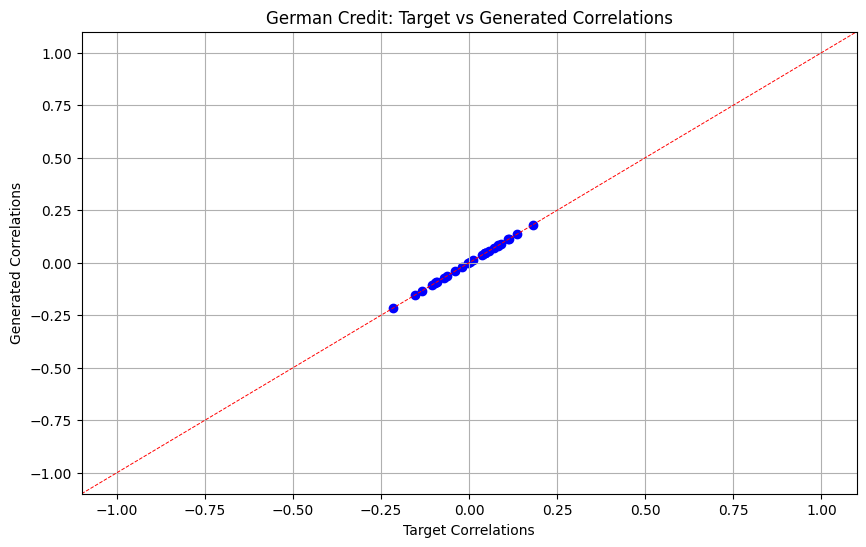

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(corr_targets_values, corr_generated, color='blue')
xlim = plt.xlim(-1.1, 1.1)
ylim = plt.ylim(-1.1, 1.1)
plt.plot(xlim, ylim, color='red', linestyle='--', label='y=x', linewidth=0.7)
plt.xlabel('Target Correlations')
plt.ylabel('Generated Correlations')
plt.title('German Credit: Target vs Generated Correlations')
plt.grid(True)
plt.show()

[PRE ] corr(col 2, s) = -0.1547
[POST] corr(col 2, s) = -0.1547


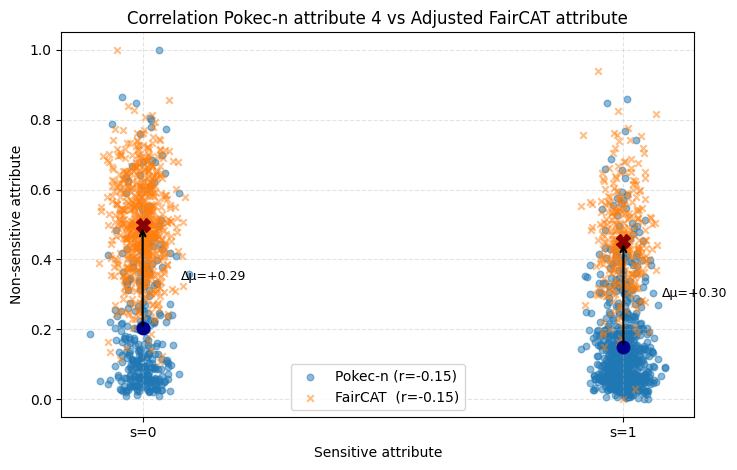

In [ ]:

s_pre  = Label_true.astype(float)
x2_pre = X_true[:, 5].astype(float)
x2_pre -= np.min(x2_pre)
x2_pre /= np.max(x2_pre)


s_post  = X[:, 0].astype(float)
x2_post = X[:, 6].astype(float)

def _safe_corr(a, b):
    a = np.asarray(a, float).ravel()
    b = np.asarray(b, float).ravel()
    if (np.std(a) < 1e-12) or (np.std(b) < 1e-12):
        return float('nan')
    return float(np.corrcoef(a, b)[0, 1])

r_pre  = _safe_corr(x2_pre,  s_pre)
r_post = _safe_corr(x2_post, s_post)

print(f"[PRE ] corr(col 2, s) = {r_pre:.4f}")
print(f"[POST] corr(col 2, s) = {r_post:.4f}")

# plotting
plt.figure(figsize=(7.5, 4.8))

# Scatter
rng = np.random.default_rng(42)
s_pre_j  = s_pre  + rng.normal(0, 0.03, size=s_pre.shape[0])
s_post_j = s_post + rng.normal(0, 0.03, size=s_post.shape[0])

plt.scatter(s_pre_j,  x2_pre,  alpha=0.5, s=22, label=f"Pokec-n (r={r_pre:.2f})")
plt.scatter(s_post_j, x2_post, alpha=0.5, s=22, marker='x', label=f"FairCAT  (r={r_post:.2f})")

def group_mean(values, groups, gval):
    m = values[np.isclose(groups, gval)]
    return np.nan if m.size == 0 else float(np.mean(m))

for g in (0.0, 1.0):
    mu_pre  = group_mean(x2_pre,  s_pre,  g)
    mu_post = group_mean(x2_post, s_post, g)

    if not (np.isnan(mu_pre) or np.isnan(mu_post)):
        # mean markers
        plt.plot([g], [mu_pre],  marker='o', ms=9, color='darkblue',  label=None)
        plt.plot([g], [mu_post], marker='X', ms=10, color='darkred',  label=None)

        # arrow showing shift
        plt.annotate(
            "", xy=(g, mu_post), xytext=(g, mu_pre),
            arrowprops=dict(arrowstyle="->", lw=1.6, color='black')
        )

        # delta text
        dmu = mu_post - mu_pre
        plt.text(g + 0.08, (mu_pre + mu_post)/2,
                 f"Δμ={dmu:+.2f}", va="center", fontsize=9)

plt.xticks([0, 1], ["s=0", "s=1"])
plt.xlabel("Sensitive attribute")
plt.ylabel("Non-sensitive attribute")
plt.title("Correlation Pokec-n attribute 4 vs Adjusted FairCAT attribute")
plt.grid(True, ls='--', alpha=0.35)
plt.legend(loc="best")
plt.tight_layout()


plt.show()

